In [584]:
import seaborn as sns
import numpy as np
import pandas as pd

In [585]:
drug= pd.read_csv('drug200.csv')
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [586]:
drug['Drug'] = drug['Drug'].astype('category')

In [587]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    object  
 2   BP           200 non-null    object  
 3   Cholesterol  200 non-null    object  
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    category
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 8.3+ KB


In [588]:
gender= {'M': 0,'F': 1}
bp= {'LOW':2,'NORMAL':3,'HIGH':4}
drug.Sex= [gender[item] for item in drug.Sex]
drug.BP= [bp[item] for item in drug.BP]
drug.Cholesterol= [bp[item] for item in drug.Cholesterol]

In [589]:
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,4,4,25.355,DrugY
1,47,0,2,4,13.093,drugC
2,47,0,2,4,10.114,drugC
3,28,1,3,4,7.798,drugX
4,61,1,2,4,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,2,4,11.567,drugC
196,16,0,2,4,12.006,drugC
197,52,0,3,4,9.894,drugX
198,23,0,3,3,14.020,drugX


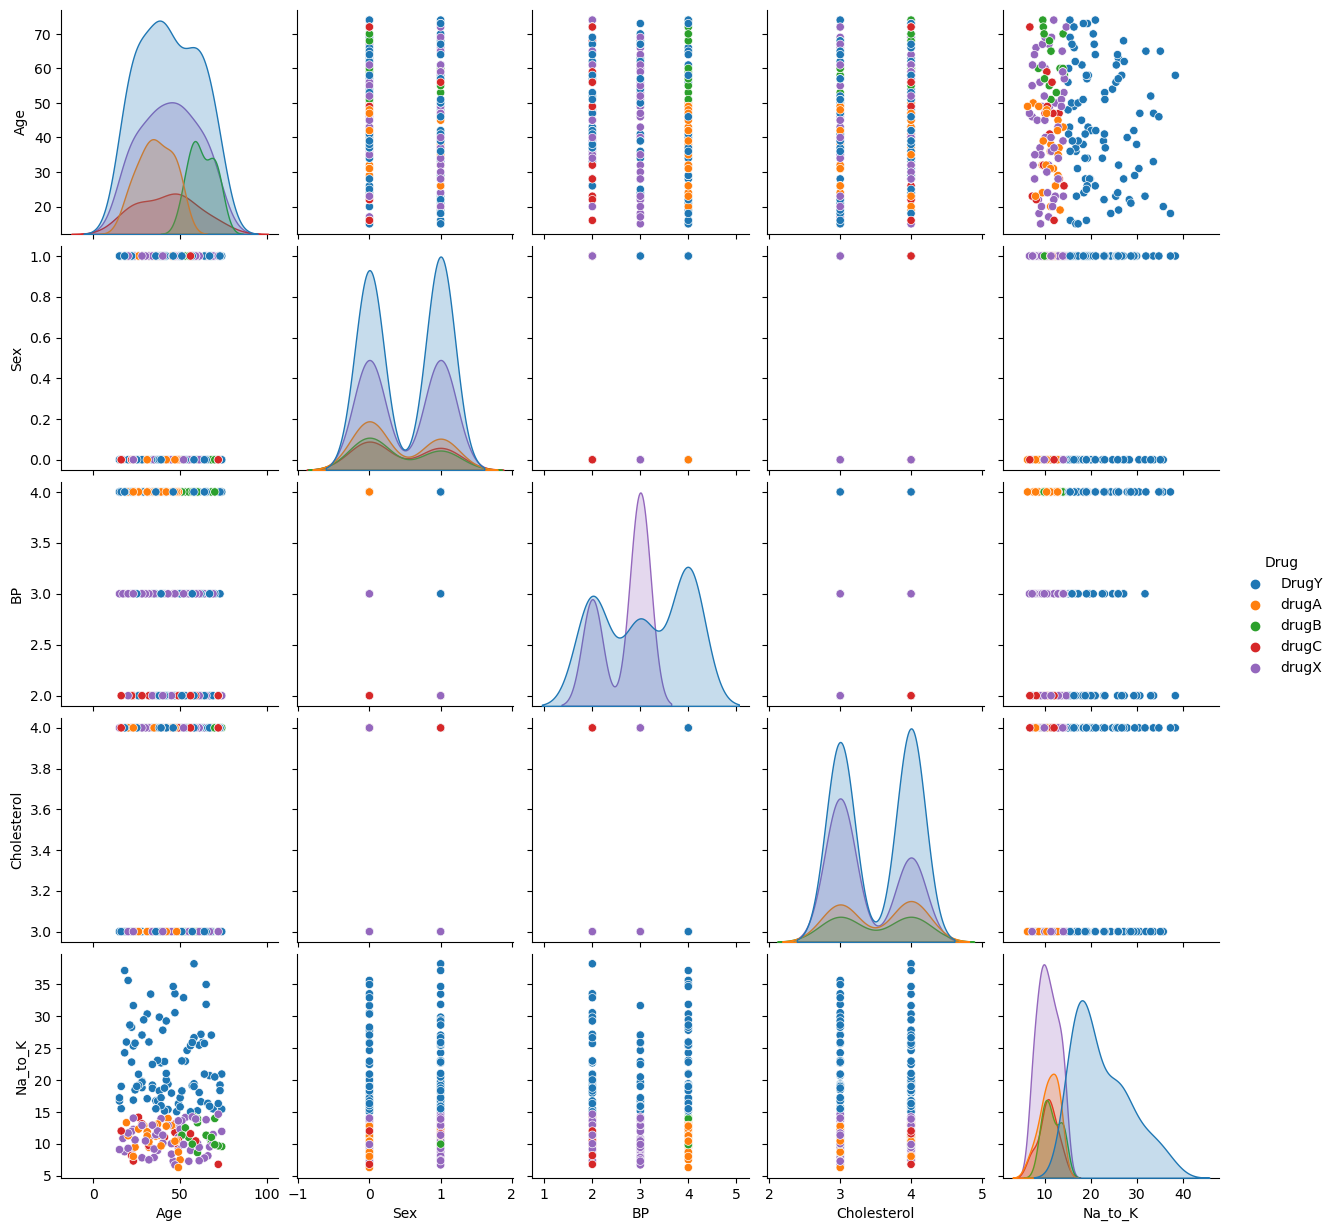

In [590]:
sns.pairplot(drug,hue="Drug")

In [591]:
drug['Cholesterol'].unique()

array([4, 3], dtype=int64)

In [592]:
drug_filtered=drug.drop(columns=['Sex'])
drug_features=drug_filtered.drop(columns=['Drug'])

In [593]:
target=pd.get_dummies(drug['Drug'])
target

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
195,0,0,0,1,0
196,0,0,0,1,0
197,0,0,0,0,1
198,0,0,0,0,1


In [594]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(drug_features,target,test_size=0.2,random_state=0,shuffle=True,stratify=target)

In [595]:
from tensorflow import keras
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [596]:
inputs = keras.Input(shape=x_train.shape[1])
hidden_layer= keras.layers.Dense(4,activation="relu")(inputs)
output_layer=keras.layers.Dense(5,activation="softmax")(hidden_layer)
model=keras.Model(inputs=inputs,outputs=output_layer)
model.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_54 (Dense)            (None, 4)                 20        
                                                                 
 dense_55 (Dense)            (None, 5)                 25        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [597]:
model.compile(optimizer='adam',loss=keras.losses.CategoricalCrossentropy())
history=model.fit(x_train,y_train,epochs=2000)

Epoch 1/2000
5/5 [==============================] - 0s 1ms/step - loss: 25.1743
Epoch 2/2000
5/5 [==============================] - 0s 750us/step - loss: 24.5959
Epoch 3/2000
5/5 [==============================] - 0s 1ms/step - loss: 24.0062
Epoch 4/2000
5/5 [==============================] - 0s 1ms/step - loss: 23.4083
Epoch 5/2000
5/5 [==============================] - 0s 750us/step - loss: 22.8338
Epoch 6/2000
5/5 [==============================] - 0s 2ms/step - loss: 22.2400
Epoch 7/2000
5/5 [==============================] - 0s 1000us/step - loss: 21.6595
Epoch 8/2000
5/5 [==============================] - 0s 750us/step - loss: 21.0672
Epoch 9/2000
5/5 [==============================] - 0s 1ms/step - loss: 20.4748
Epoch 10/2000
5/5 [==============================] - 0s 751us/step - loss: 19.8661
Epoch 11/2000
5/5 [==============================] - 0s 748us/step - loss: 19.2647
Epoch 12/2000
5/5 [==============================] - 0s 1000us/step - loss: 18.6322
Epoch 13/2000
5/5 [==

5/5 [==============================] - 0s 501us/step - loss: 1.0298
Epoch 102/2000
5/5 [==============================] - 0s 750us/step - loss: 1.0275
Epoch 103/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.0255
Epoch 104/2000
5/5 [==============================] - 0s 501us/step - loss: 1.0252
Epoch 105/2000
5/5 [==============================] - 0s 751us/step - loss: 1.0236
Epoch 106/2000
5/5 [==============================] - 0s 999us/step - loss: 1.0215
Epoch 107/2000
5/5 [==============================] - 0s 751us/step - loss: 1.0199
Epoch 108/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.0191
Epoch 109/2000
5/5 [==============================] - 0s 1000us/step - loss: 1.0172
Epoch 110/2000
5/5 [==============================] - 0s 750us/step - loss: 1.0160
Epoch 111/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.0152
Epoch 112/2000
5/5 [==============================] - 0s 750us/step - loss: 1.0141
Epoch 113/2000
5/5 [====

5/5 [==============================] - 0s 1000us/step - loss: 0.9525
Epoch 201/2000
5/5 [==============================] - 0s 751us/step - loss: 0.9523
Epoch 202/2000
5/5 [==============================] - 0s 750us/step - loss: 0.9509
Epoch 203/2000
5/5 [==============================] - 0s 750us/step - loss: 0.9517
Epoch 204/2000
5/5 [==============================] - 0s 750us/step - loss: 0.9496
Epoch 205/2000
5/5 [==============================] - 0s 750us/step - loss: 0.9497
Epoch 206/2000
5/5 [==============================] - 0s 750us/step - loss: 0.9493
Epoch 207/2000
5/5 [==============================] - 0s 750us/step - loss: 0.9485
Epoch 208/2000
5/5 [==============================] - 0s 750us/step - loss: 0.9472
Epoch 209/2000
5/5 [==============================] - 0s 750us/step - loss: 0.9469
Epoch 210/2000
5/5 [==============================] - 0s 751us/step - loss: 0.9468
Epoch 211/2000
5/5 [==============================] - 0s 750us/step - loss: 0.9456
Epoch 212/2000
5/5

5/5 [==============================] - 0s 751us/step - loss: 0.8923
Epoch 300/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8920
Epoch 301/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8919
Epoch 302/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8903
Epoch 303/2000
5/5 [==============================] - 0s 751us/step - loss: 0.8905
Epoch 304/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8898
Epoch 305/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8885
Epoch 306/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8879
Epoch 307/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.8868
Epoch 308/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8866
Epoch 309/2000
5/5 [==============================] - 0s 751us/step - loss: 0.8860
Epoch 310/2000
5/5 [==============================] - 0s 683us/step - loss: 0.8851
Epoch 311/2000
5/5

5/5 [==============================] - 0s 750us/step - loss: 0.8288
Epoch 398/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8282
Epoch 399/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8279
Epoch 400/2000
5/5 [==============================] - 0s 751us/step - loss: 0.8281
Epoch 401/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8255
Epoch 402/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8257
Epoch 403/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8256
Epoch 404/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8253
Epoch 405/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8236
Epoch 406/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8241
Epoch 407/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8226
Epoch 408/2000
5/5 [==============================] - 0s 750us/step - loss: 0.8222
Epoch 409/2000
5/5 [===

5/5 [==============================] - 0s 825us/step - loss: 0.7705
Epoch 497/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7703
Epoch 498/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7697
Epoch 499/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7689
Epoch 500/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7687
Epoch 501/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7691
Epoch 502/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7681
Epoch 503/2000
5/5 [==============================] - 0s 751us/step - loss: 0.7680
Epoch 504/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7665
Epoch 505/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7675
Epoch 506/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7664
Epoch 507/2000
5/5 [==============================] - 0s 751us/step - loss: 0.7653
Epoch 508/2000
5/5 

5/5 [==============================] - 0s 750us/step - loss: 0.7197
Epoch 596/2000
5/5 [==============================] - 0s 751us/step - loss: 0.7192
Epoch 597/2000
5/5 [==============================] - 0s 751us/step - loss: 0.7185
Epoch 598/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7182
Epoch 599/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7179
Epoch 600/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7175
Epoch 601/2000
5/5 [==============================] - 0s 500us/step - loss: 0.7165
Epoch 602/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7164
Epoch 603/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7172
Epoch 604/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7155
Epoch 605/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7142
Epoch 606/2000
5/5 [==============================] - 0s 750us/step - loss: 0.7147
Epoch 607/2000
5/5 [===

5/5 [==============================] - 0s 750us/step - loss: 0.6727
Epoch 695/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6717
Epoch 696/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6715
Epoch 697/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6719
Epoch 698/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6701
Epoch 699/2000
5/5 [==============================] - 0s 751us/step - loss: 0.6701
Epoch 700/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6692
Epoch 701/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6693
Epoch 702/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.6680
Epoch 703/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6678
Epoch 704/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6675
Epoch 705/2000
5/5 [==============================] - 0s 771us/step - loss: 0.6665
Epoch 706/2000
5/5 [=

Epoch 793/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6300
Epoch 794/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6302
Epoch 795/2000
5/5 [==============================] - 0s 751us/step - loss: 0.6294
Epoch 796/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6294
Epoch 797/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6282
Epoch 798/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6288
Epoch 799/2000
5/5 [==============================] - 0s 597us/step - loss: 0.6275
Epoch 800/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6273
Epoch 801/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6271
Epoch 802/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6265
Epoch 803/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6259
Epoch 804/2000
5/5 [==============================] - 0s 750us/step - loss: 0.6256
Epoc

5/5 [==============================] - 0s 750us/step - loss: 0.5925
Epoch 892/2000
5/5 [==============================] - 0s 751us/step - loss: 0.5931
Epoch 893/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5919
Epoch 894/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5918
Epoch 895/2000
5/5 [==============================] - 0s 751us/step - loss: 0.5917
Epoch 896/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5909
Epoch 897/2000
5/5 [==============================] - 0s 501us/step - loss: 0.5907
Epoch 898/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5908
Epoch 899/2000
5/5 [==============================] - 0s 509us/step - loss: 0.5900
Epoch 900/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5899
Epoch 901/2000
5/5 [==============================] - 0s 500us/step - loss: 0.5892
Epoch 902/2000
5/5 [==============================] - 0s 751us/step - loss: 0.5885
Epoch 903/2000
5/5 [=

5/5 [==============================] - 0s 750us/step - loss: 0.5583
Epoch 991/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5574
Epoch 992/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5575
Epoch 993/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5570
Epoch 994/2000
5/5 [==============================] - 0s 501us/step - loss: 0.5567
Epoch 995/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5566
Epoch 996/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5572
Epoch 997/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5556
Epoch 998/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5558
Epoch 999/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5551
Epoch 1000/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.5559
Epoch 1001/2000
5/5 [==============================] - 0s 757us/step - loss: 0.5548
Epoch 1002/2000
5/5 [=

5/5 [==============================] - 0s 750us/step - loss: 0.5260
Epoch 1089/2000
5/5 [==============================] - 0s 751us/step - loss: 0.5262
Epoch 1090/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5243
Epoch 1091/2000
5/5 [==============================] - 0s 749us/step - loss: 0.5252
Epoch 1092/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5242
Epoch 1093/2000
5/5 [==============================] - 0s 904us/step - loss: 0.5236
Epoch 1094/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5226
Epoch 1095/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5230
Epoch 1096/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5223
Epoch 1097/2000
5/5 [==============================] - 0s 750us/step - loss: 0.5220
Epoch 1098/2000
5/5 [==============================] - 0s 751us/step - loss: 0.5222
Epoch 1099/2000
5/5 [==============================] - 0s 773us/step - loss: 0.5235
Epoch 1100

Epoch 1186/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4940
Epoch 1187/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4940
Epoch 1188/2000
5/5 [==============================] - 0s 751us/step - loss: 0.4929
Epoch 1189/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4928
Epoch 1190/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4921
Epoch 1191/2000
5/5 [==============================] - 0s 500us/step - loss: 0.4920
Epoch 1192/2000
5/5 [==============================] - 0s 793us/step - loss: 0.4917
Epoch 1193/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4912
Epoch 1194/2000
5/5 [==============================] - 0s 680us/step - loss: 0.4917
Epoch 1195/2000
5/5 [==============================] - 0s 751us/step - loss: 0.4909
Epoch 1196/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4908
Epoch 1197/2000
5/5 [==============================] - 0s 751us/step - loss: 0.4904


5/5 [==============================] - 0s 751us/step - loss: 0.4605
Epoch 1284/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4598
Epoch 1285/2000
5/5 [==============================] - 0s 500us/step - loss: 0.4595
Epoch 1286/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4592
Epoch 1287/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4592
Epoch 1288/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4586
Epoch 1289/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4615
Epoch 1290/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.4595
Epoch 1291/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4606
Epoch 1292/2000
5/5 [==============================] - 0s 500us/step - loss: 0.4572
Epoch 1293/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.4574
Epoch 1294/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4562
Epoch 12

5/5 [==============================] - 0s 750us/step - loss: 0.4276
Epoch 1382/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4289
Epoch 1383/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4278
Epoch 1384/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4264
Epoch 1385/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4263
Epoch 1386/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4259
Epoch 1387/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4257
Epoch 1388/2000
5/5 [==============================] - 0s 751us/step - loss: 0.4251
Epoch 1389/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4245
Epoch 1390/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4243
Epoch 1391/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4254
Epoch 1392/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4262
Epoch 1393/2

Epoch 1479/2000
5/5 [==============================] - 0s 750us/step - loss: 0.4003
Epoch 1480/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3997
Epoch 1481/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3986
Epoch 1482/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.3982
Epoch 1483/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3982
Epoch 1484/2000
5/5 [==============================] - 0s 794us/step - loss: 0.3971
Epoch 1485/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.3983
Epoch 1486/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3972
Epoch 1487/2000
5/5 [==============================] - 0s 501us/step - loss: 0.3965
Epoch 1488/2000
5/5 [==============================] - 0s 751us/step - loss: 0.3999
Epoch 1489/2000
5/5 [==============================] - 0s 751us/step - loss: 0.3979
Epoch 1490/2000
5/5 [==============================] - 0s 751us/step - los

5/5 [==============================] - 0s 1ms/step - loss: 0.3740
Epoch 1577/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.3732
Epoch 1578/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3745
Epoch 1579/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.3731
Epoch 1580/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.3723
Epoch 1581/2000
5/5 [==============================] - 0s 751us/step - loss: 0.3724
Epoch 1582/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3737
Epoch 1583/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3726
Epoch 1584/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3718
Epoch 1585/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3712
Epoch 1586/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3708
Epoch 1587/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3715
Epoch 1588/2000

5/5 [==============================] - 0s 1ms/step - loss: 0.3501
Epoch 1675/2000
5/5 [==============================] - 0s 999us/step - loss: 0.3500
Epoch 1676/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3500
Epoch 1677/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3505
Epoch 1678/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3491
Epoch 1679/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3502
Epoch 1680/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3482
Epoch 1681/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3483
Epoch 1682/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3507
Epoch 1683/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3480
Epoch 1684/2000
5/5 [==============================] - 0s 751us/step - loss: 0.3481
Epoch 1685/2000
5/5 [==============================] - 0s 751us/step - loss: 0.3483
Epoch 1686/2000
5/5 

5/5 [==============================] - 0s 750us/step - loss: 0.3287
Epoch 1773/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3285
Epoch 1774/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3302
Epoch 1775/2000
5/5 [==============================] - 0s 500us/step - loss: 0.3293
Epoch 1776/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3287
Epoch 1777/2000
5/5 [==============================] - 0s 751us/step - loss: 0.3285
Epoch 1778/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3281
Epoch 1779/2000
5/5 [==============================] - 0s 803us/step - loss: 0.3279
Epoch 1780/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3285
Epoch 1781/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3279
Epoch 1782/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3267
Epoch 1783/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.3280
Epoch 1784/

5/5 [==============================] - 0s 751us/step - loss: 0.3114
Epoch 1870/2000
5/5 [==============================] - 0s 785us/step - loss: 0.3097
Epoch 1871/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3107
Epoch 1872/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3102
Epoch 1873/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.3116
Epoch 1874/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.3106
Epoch 1875/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3100
Epoch 1876/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3095
Epoch 1877/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3107
Epoch 1878/2000
5/5 [==============================] - 0s 750us/step - loss: 0.3082
Epoch 1879/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3089
Epoch 1880/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.3098
Epoch 1881/20

Epoch 1967/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2944
Epoch 1968/2000
5/5 [==============================] - 0s 750us/step - loss: 0.2932
Epoch 1969/2000
5/5 [==============================] - 0s 750us/step - loss: 0.2939
Epoch 1970/2000
5/5 [==============================] - 0s 751us/step - loss: 0.2946
Epoch 1971/2000
5/5 [==============================] - 0s 1000us/step - loss: 0.2932
Epoch 1972/2000
5/5 [==============================] - 0s 750us/step - loss: 0.2919
Epoch 1973/2000
5/5 [==============================] - 0s 750us/step - loss: 0.2924
Epoch 1974/2000
5/5 [==============================] - 0s 751us/step - loss: 0.2927
Epoch 1975/2000
5/5 [==============================] - 0s 750us/step - loss: 0.2922
Epoch 1976/2000
5/5 [==============================] - 0s 750us/step - loss: 0.2918
Epoch 1977/2000
5/5 [==============================] - 0s 750us/step - loss: 0.2914
Epoch 1978/2000
5/5 [==============================] - 0s 750us/step - loss: 

<AxesSubplot:>

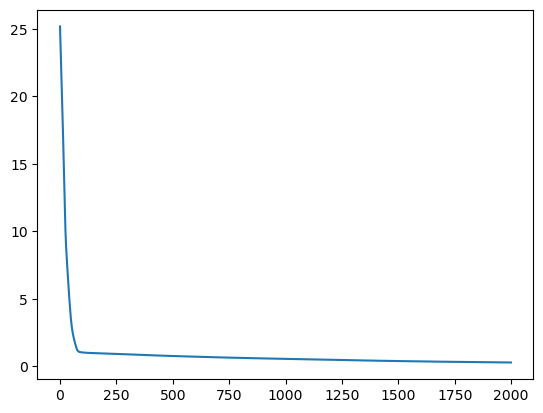

In [598]:
sns.lineplot(x=history.epoch,y=history.history['loss'])

In [599]:
y_pred = model.predict(x_test)
prediction= pd.DataFrame(y_pred,columns=target.columns)
prediction

2/2 [==============================] - 0s 1ms/step


,DrugY,drugA,drugB,drugC,drugX
0,0.001762,6.431593e-01,3.020923e-01,8.802836e-06,5.297752e-02
1,0.060559,7.931342e-03,2.236268e-03,5.171326e-02,8.775605e-01
2,0.006099,1.727781e-01,7.395526e-01,1.120354e-05,8.155870e-02
3,0.959514,4.757707e-03,1.415096e-05,2.768831e-06,3.571099e-02
4,0.738703,3.417443e-06,3.620441e-06,4.060398e-02,2.206863e-01
5,0.999997,2.371803e-11,1.437312e-15,4.891902e-10,3.153850e-06
6,0.004383,7.406558e-01,5.280121e-02,3.280598e-04,2.018321e-01
7,0.006514,6.066554e-06,1.139742e-03,7.151855e-01,2.771544e-01
8,1.000000,2.243418e-26,5.560769e-30,1.195179e-14,2.622180e-12
9,0.898113,9.972950e-06,1.473863e-06,2.797898e-03,9.907800e-02


In [600]:
predicted_drug= prediction.idxmax(axis='columns')
print(predicted_drug)

0     drugA
1     drugX
2     drugB
3     DrugY
4     DrugY
5     DrugY
6     drugA
7     drugC
8     DrugY
9     DrugY
10    drugA
11    drugX
12    DrugY
13    drugX
14    DrugY
15    drugX
16    DrugY
17    drugA
18    DrugY
19    drugX
20    DrugY
21    drugB
22    drugX
23    DrugY
24    DrugY
25    drugX
26    drugX
27    DrugY
28    DrugY
29    DrugY
30    drugC
31    drugC
32    drugX
33    DrugY
34    drugA
35    DrugY
36    drugX
37    drugX
38    DrugY
39    drugA
dtype: object


In [601]:
from sklearn.metrics import confusion_matrix
true_drug = y_test.idxmax(axis='columns')
true_drug=true_drug.reset_index(drop=True)
matrix=confusion_matrix(true_drug,predicted_drug)
print("Accuracy : ",np.sum(predicted_drug.reset_index(drop=True)==true_drug.reset_index(drop= True))/40)

Accuracy :  0.925


In [602]:
print(true_drug)

0     drugA
1     drugX
2     drugB
3     DrugY
4     drugX
5     DrugY
6     drugA
7     drugC
8     DrugY
9     DrugY
10    drugA
11    drugX
12    DrugY
13    drugX
14    DrugY
15    drugX
16    DrugY
17    drugA
18    DrugY
19    drugX
20    DrugY
21    drugB
22    DrugY
23    DrugY
24    DrugY
25    drugX
26    drugX
27    DrugY
28    DrugY
29    DrugY
30    drugC
31    drugC
32    drugX
33    DrugY
34    drugB
35    DrugY
36    drugX
37    drugX
38    DrugY
39    drugA
dtype: object


<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

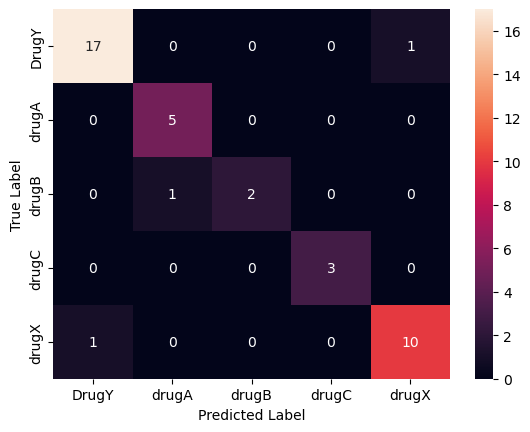

In [603]:
confusion_df = pd.DataFrame(matrix,index=y_test.columns.values, columns=y_test.columns.values)
confusion_df.index.name='True Label'
confusion_df.columns.name='Predicted Label'
sns.heatmap(confusion_df,annot=True)

In [604]:
drug_filtered

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,4,4,25.355,DrugY
1,47,2,4,13.093,drugC
2,47,2,4,10.114,drugC
3,28,3,4,7.798,drugX
4,61,2,4,18.043,DrugY
...,...,...,...,...,...
195,56,2,4,11.567,drugC
196,16,2,4,12.006,drugC
197,52,3,4,9.894,drugX
198,23,3,3,14.020,drugX
